# TicTacToe - Human vs AI
## Introduction
This project aims to develop a Tic-Tac-Toe game using a machine learning model. Human player plays with AI model.
- player X : Human
- player O : AI

## Requirements
- Python 3.x
- **Libraries**: NumPy, scikit-learn, Pandas, Matplotlib, Seaborn

## Instructions
1. Load the dataset.
2. Train the model.
3. Test the model.
4. Use the model in the game logic to predict the move played by AI


## Model
**Random Forest Classifier**
- **Accuracy**: 95.42
- **Task**: Classification
- **Model Functionality**: RandomForestClassifier predicts the next move in the game board by taking current board as input. The predicted move is placed by the AI player


In [31]:
import warnings
warnings.filterwarnings("ignore")

## **Data loading, Preprocessing and Training**

In [41]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, auc, roc_curve, RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [42]:
df = pd.read_csv("tictac_intermediate.txt", header=None, delimiter=" ", names=["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "y"])
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,y
0,1,-1,0,0,0,0,0,1,0,6
1,1,0,1,0,0,0,0,-1,0,1
2,0,0,0,0,0,1,0,0,0,2
3,0,1,1,0,0,0,0,-1,0,0
4,1,1,-1,0,0,0,0,-1,0,3


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6551 entries, 0 to 6550
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x1      6551 non-null   int64
 1   x2      6551 non-null   int64
 2   x3      6551 non-null   int64
 3   x4      6551 non-null   int64
 4   x5      6551 non-null   int64
 5   x6      6551 non-null   int64
 6   x7      6551 non-null   int64
 7   x8      6551 non-null   int64
 8   x9      6551 non-null   int64
 9   y       6551 non-null   int64
dtypes: int64(10)
memory usage: 511.9 KB


In [44]:
X = df.drop(["y"], axis=1)
y = df["y"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=53, shuffle=True)
X_train.shape

(5895, 9)

In [6]:
X_test.shape

(656, 9)

In [46]:
position_predict_model = RandomForestClassifier(  ).fit(X_train, y_train)
y_predict = (position_predict_model.predict(X_test)).astype(int)

In [1]:
from google.colab import files
files = files.upload()

Saving tictac_intermediate.txt to tictac_intermediate.txt
Saving tictac_endgame.txt to tictac_endgame.txt


## **Testing & Metric Evaluation**

Accuracy: 0.950
Precision: 0.950
Recall: 0.950
F1 Score: 0.950


Text(113.9222222222222, 0.5, 'predicted label')

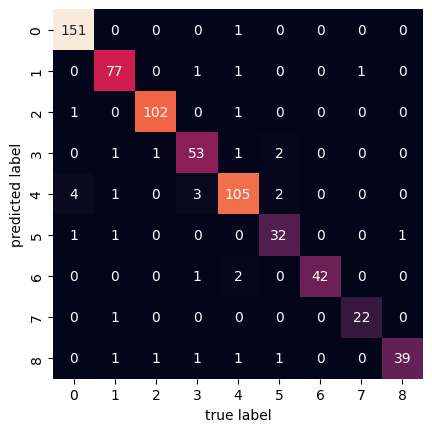

In [38]:
# Accuracy and Confusion Matrix for test data
accuracy = accuracy_score(y_test, position_predict_model.predict(X_test))
print("Accuracy: %.3f" % accuracy)

precision = precision_score(y_test, position_predict_model.predict(X_test), average="micro")
print("Precision: %.3f" % precision)

recall = recall_score(y_test, position_predict_model.predict(X_test), average="micro")
print("Recall: %.3f" % recall)

f1 = f1_score(y_test, position_predict_model.predict(X_test), average="micro")
print("F1 Score: %.3f" % f1)

cm = confusion_matrix(y_test, position_predict_model.predict(X_test))
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

## **Hyperparameter Tuning**

In [79]:
param_grid = {"n_estimators" : [50, 100, 200],
              "criterion" : ["gini", "entropy", "log_loss"],
              'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
            }

In [80]:
model = GridSearchCV(estimator = RandomForestClassifier(), param_grid=param_grid)
model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [86]:
model.best_params_

{'criterion': 'log_loss',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [91]:
accuracy_score(y_test, model.predict(X_test))

0.9542682926829268

>  ### The original model performs same as the tuned model, hence i am going to use original model in the game logic.

## **Game Logic**

In [33]:
class Board:
    def __init__(self):
        self.board = [[" " for _ in range(3)] for _ in range(3)]

    def printBoard(self):
        #Displays the current board whenever the function is called
        print("-"*23)
        print("|R\\C|  0  |  1  |  2  |")
        for i in range(0, 3):
            print("-"*23)
            print(f"| {i} |  {self.board[i][0]}  |  {self.board[i][1]}  |  {self.board[i][2]}  |")
        print("-"*23)
        return -1

class Game:
    def __init__(self):
        self.board = Board()
        self.turn = "X"
        self.moves = 0

    def switchPlayer(self):
        #Switch player
        self.turn = "O" if self.turn == "X" else "X"

    def validateEntry(self, r, c):
        if not (0 <= r < 3) or not (0 <= c < 3):
            print("Invalid entry: try again.")
            print("Row & column numbers must be either 0, 1 or 2.")
            return 0

        #Validates if the cell is empty
        if self.board.board[r][c] != " ":
            print("That cell is already taken.")
            print("Please make another selection.")
            return 0

        return 1

    def checkFull(self):
        return self.moves == 9

    def checkWin(self):
        """
        Checks if the current player has won the game.
        Scans rows, columns, and diagonals for four consecutive cells of the player's symbol.
        Returns:
            int: 1 if the player has won, 0 otherwise.
        """
        #row & column check
        for i in range(0, 3):
            if (self.board.board[i][0] == self.board.board[i][1] == self.board.board[i][2] == self.turn):
                return 1
            if (self.board.board[0][i] == self.board.board[1][i] == self.board.board[2][i] == self.turn):
                return 1

        #diagnol check
        if self.board.board[0][0] == self.board.board[1][1] == self.board.board[2][2] == self.turn:
            return 1
        if self.board.board[0][2] == self.board.board[1][1] == self.board.board[2][0] == self.turn:
            return 1

        return 0

    def checkEnd(self):
        """
        CheckEnd(self) returns True if a game is over, otherwise, returns False.
        """
        if self.checkWin():
            if self.turn == "X":
              print("X IS THE WINNER!!!")
              print("Human won the Game! You won the game.")
            else:
              print("AI IS THE WINNER!!!")
              print("You have lost the game.")

            print(f"{self.turn} IS THE WINNER!!!")
            return True
        elif self.checkFull():
            print("DRAW! NOBODY WINS!")
            return True
        return False

    def playAI(self):
        ind_map = {0 : (0, 0), 1 : (0, 1), 2 : (0, 2), }
        arr = np.hstack(self.board.board).reshape(1, -1)
        arr = np.where(arr == "X", 1, arr)
        arr = np.where(arr == "O", -1, arr)
        arr = np.where(arr == " ", 0, arr)
        position = position_predict_model.predict(arr)
        row, col = int(position//3), int(position%3)
        return row, col


    def playGame(self):
        """ plays tic-tac-toe game by calling other methods. """
        print("----------------------------------------------------------------------")
        print("--------------------- Human vs AI TicTacToe --------------------------")
        print("----------------------------------------------------------------------")
        print("Human plays as 'X', AI plays as 'O' ")
        print()
        print("New Game: X goes first.\n")

        self.board.printBoard()

        while True:
            # Prompt the current player to make a move
            if self.turn == "O":
              r, c = self.playAI()
              print("\nAI's turn now")
              print(f"AI has entered row #{r} \n  \t  and column  #{c}")

            if self.turn == "X":
              print(f"\nIt is your turn.")
              print(f"Where do you want your {self.turn} placed?")
              print("Please enter row number and column number seperated by a comma.")
              r, c = list((map(int, input().split(","))))
              print(f"You have entered row #{r} \n  \t  and column  #{c}")

              # Validate the entry
              if not self.validateEntry(r, c):
                  continue

              # Update the board with the player's move
              print("Thank you for your selection.")

            self.board.board[r][c] = self.turn
            self.moves += 1
            self.board.printBoard()

            # Check if the game has ended
            if self.checkEnd():
                break

            # Switch player for the next turn
            self.switchPlayer()



# Start the game
def main():
    repeat = "y"

    while repeat[0].lower() == "y":
        game = Game()
        game.playGame()
        repeat = input("\nAnother game? Enter Y or y for yes.\n")

    print("Thank you for playing!")

if __name__ == "__main__":
    main()



----------------------------------------------------------------------
--------------------- Human vs AI TicTacToe --------------------------
----------------------------------------------------------------------
Human plays as 'X', AI plays as 'O' 

New Game: X goes first.

-----------------------
|R\C|  0  |  1  |  2  |
-----------------------
| 0 |     |     |     |
-----------------------
| 1 |     |     |     |
-----------------------
| 2 |     |     |     |
-----------------------

It is your turn.
Where do you want your X placed?
Please enter row number and column number seperated by a comma.
1,1
You have entered row #1 
  	  and column  #1
Thank you for your selection.
-----------------------
|R\C|  0  |  1  |  2  |
-----------------------
| 0 |     |     |     |
-----------------------
| 1 |     |  X  |     |
-----------------------
| 2 |     |     |     |
-----------------------

AI's turn now
AI has entered row #0 
  	  and column  #0
-----------------------
|R\C|  0  |  1  